In [2]:
import pandas
import matplotlib.pyplot as plt
import numpy as np

get_ipython().magic(u'matplotlib inline')

In [3]:
data_path = "data/data_for_student_case.csv"
data = pandas.read_csv(data_path, header=0)
data_fraud = data.loc[data['simple_journal'] == 'Chargeback']
data_settled = data.loc[data['simple_journal'] == 'Settled']
data_unknown = data.loc[data['simple_journal'] == 'Refused']

In [4]:
amount_all = data['amount']
amount_fraud = data_fraud['amount']
amount_settled = data_settled['amount']
amount_unknown = data_unknown['amount']

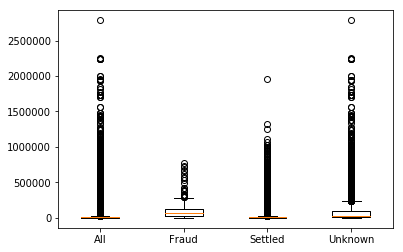

In [33]:
fig, ax = plt.subplots()
ax.boxplot([amount_all, amount_fraud, amount_settled, amount_unknown])
ax.set_xticklabels(["All", "Fraud", "Settled", "Unknown"])
plt.savefig("plots/boxplot.png", format="png")

In [5]:
# https://en.wikipedia.org/wiki/Benford%27s_law
def benford(data):
    benfords = []
    for amount in data:
        benfords.append(int(str(amount)[:1]))
    return benfords

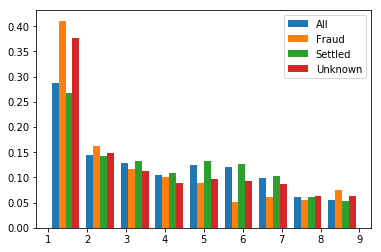

In [29]:
benfords_all = benford(amount_all)
benfords_fraud = benford(amount_fraud)
benfords_settled = benford(amount_settled)
benfords_unknown = benford(amount_unknown)
plt.hist([benfords_all, benfords_fraud, benfords_settled, benfords_unknown], bins=9, density=True)
plt.legend(["All", "Fraud", "Settled", "Unknown"])
plt.savefig("plots/benford.png", format="png")

In [7]:
amount_all_percentile = [np.percentile(amount_all, 5), np.percentile(amount_all, 25), np.percentile(amount_all, 75), np.percentile(amount_all, 95)]
amount_fraud_percentile = [np.percentile(amount_fraud, 5), np.percentile(amount_fraud, 25), np.percentile(amount_fraud, 75), np.percentile(amount_fraud, 95)]
amount_settled_percentile = [np.percentile(amount_settled, 5), np.percentile(amount_settled, 25), np.percentile(amount_settled, 75), np.percentile(amount_settled, 95)]
amount_unknown_percentile = [np.percentile(amount_unknown, 5), np.percentile(amount_unknown, 25), np.percentile(amount_unknown, 75), np.percentile(amount_unknown, 95)]
print(amount_all_percentile)
print(amount_fraud_percentile)
print(amount_settled_percentile)
print(amount_unknown_percentile)

[2105.0, 4400.0, 15895.0, 135830.0]
[7850.0, 26000.0, 129900.0, 329900.0]
[1995.0, 4000.0, 11850.0, 97580.0]
[2995.0, 7145.0, 102000.0, 299225.0]


In [19]:
# check countries where a lot of fraud occurs?
countries = data['issuercountrycode'].value_counts()[:5]/len(data)/0.01
countries_fraud = data_fraud['issuercountrycode'].value_counts()[:5]/len(data_fraud)/0.01
countries_settled = data_settled['issuercountrycode'].value_counts()[:5]/len(data_settled)/0.01
countries_unknown = data_unknown['issuercountrycode'].value_counts()[:5]/len(data_unknown)/0.01
print(countries)
print(countries_fraud)
print(countries_settled)
print(countries_unknown)

GB    69.067642
AU     8.667893
MX     8.466089
SE     8.226750
NZ     1.723247
Name: issuercountrycode, dtype: float64
MX    45.217391
AU    33.333333
GB     9.565217
SE     5.797101
NZ     1.739130
Name: issuercountrycode, dtype: float64
GB    75.135092
AU     9.456633
SE     7.716812
MX     4.214778
NZ     1.921915
Name: issuercountrycode, dtype: float64
GB    42.531774
MX    27.091066
SE    10.505005
US     7.318262
AU     5.008810
Name: issuercountrycode, dtype: float64
